# Differential Equations

based in Diego Restrepo notebooks. https://github.com/restrepo/ComputationalMethods

Differential equations is without doubt one of the more useful branch of mathematics in science. They are used to model problems involving the change of some variable with respect to another. Differential equations cover a wide range of different applications, ranging from ordinary differential equations (ODE) until boundary-value problems involving many variables. For the sake of simplicity, throughout this section we shall cover only ODE systems as they are more elemental and equally useful. First, we shall cover first order methods, then second order methods and finally, system of differential equations.

- - -
- [First Order Methods](#First-Order-Methods)
    - [Euler's method](#Euler's-method)
    - [Example 1](#Example-1)
- [High Order Methods](#High-Order-Methods)
    - [Second-order Runge-Kutta methods](#Second-order-Runge-Kutta-methods)
    - [Example 2](#Example-2)
    - [Fourth-order Runge-Kutta method](#Fourth-order-Runge-Kutta-method)
- [Two-Point Boundary Value Problems](#Two-Point-Boundary-Value-Problems)
    - [Example 3](#Example-3)

- - -

In [8]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/juan/Workspace/Base/Python/FisCom1/.venv/lib/python3.11/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


- - -

#First Order Methods

Ordinary differential equations normally implies the solution of an initial-value problem, i.e., the solution has to satisfy the differential equation together with some initial condition. Real-life problems usually imply very complicated problems and even non-soluble ones, making any analytical approximation unfeasible. Fortunately, there are two ways to handle this. First, for almost every situation, it is generally posible to simplify the original problem and obtain a simpler one that can be easily solved. Then, using perturbation theory, we can perturbate this solution in order to approximate the real one. This approach is useful, however, it depends very much on the specific problem and a systematic study is rather complicated.

The second approximation, and the one used here, consists of a complete numerical reduction of the problem, solving it exactly within the accuracy allowed by implicit errors of the methods. For this part, we are going to assume well-defined problems, where solutions are expected to be well-behaved.

##Euler's method

This method is the most basic of all methods, however, it is useful to understand basic concepts and definitions of differential equations problems.

Suppose we have a well-posed initial-value problem given by:

$$ \frac{dy}{dt}=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha $$

Now, let's define a **mesh points** as a set of values $\{t_i\}t_i$ where we are going to approximate the solution $y(t)$. These points can be equal-spaced such that

$$ t_i = a+ i h,\ \ \ \ \mbox{with}\ \ i=1,2,3,\cdots,N \ \ \mbox{and}\ h = \frac{b-a}{N}. $$

Here, $h$ is called the **step size** of the **mesh points**.

Now, using the first-order approximation of the derivative saw in [Numerical Differentiation](http://nbviewer.ipython.org/github/sbustamante/ComputationalMethods/blob/master/material/numerical-calculus.ipynb#Numerical-Differentiation), we obtain

$$ \frac{dy}{dt}\approx \frac{y(t+h)-y(t)}{h} $$

or

$$ \left.\frac{dy}{dt}\right|_{t=t_i}\approx \frac{y(t_{i+1})-y(t_i)}{h} $$

The original problem can be rewritten as

$$ y_{i+1} = y_i + hf(t_i, y_i) + \frac{h^2}{2}y^{''}(\xi_i) $$

where the notation $y(t_i)\equiv y_i$ has been introduced and the last term (error term) can be obtained taking a second-order approximation of the derivative.

This equation can be solved recursively as we know the initial value $y_0 = y(a) = \alpha$.

##Example 1

The formalism of the Euler's method can be applied for any system of the form:

$$ \frac{dy}{dt}=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha $$

However, it is possible to extend this to second-order systems, i.e., systems involving second derivatives. Let's suppose a general system of the form:

$$ \frac{d^2y}{dt^2}+ g(t,y)\frac{dy}{dt}=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha\ \ \mbox{and}\ y'(a) = \beta$$

For this system we have to provide both, the initial value $y(a)$ and the initial derivative $y'(a)$.

Now, let's define a new variable $w(t) = y'(t)$, the previous problem can be then written as

$$ \matrix{\frac{dw}{dt}=-g(t,y)w+f(t,y) \\  \frac{dy}{dt}=w(t)} ,\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha\ \ \mbox{and}\ w(a) = \beta$$

Each of this problem has now the form required by the Euler's algorithm, and the solution can be computed as:

$$ \matrix{w_{i+1}= w_{i} + h[g(t_i,y_i)w_i-f(t_i,y_i)] \\  y_{i+1}=y_i + hw_i} ,\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha\ \ \mbox{and}\ w(a) = \beta$$

- - -

In order to apply this, let's assume a simple mass-spring.

![](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/master/material/figures/mass_spring.png)

The equation of motion according to Newton's second law is

$$ m\frac{d^2x}{dt^2} = -kx $$

Using the previous results, we can rewrite this as:

$$ \frac{dv}{dt} = -\frac{k}{m}x $$
$$ \frac{dx}{dt} = v $$

And the equivalent Euler system is

$$ \matrix{v_{i+1}= v_{i} - h\frac{k}{m}x_i \\  x_{i+1}=x_i + hv_i} ,\ \ \ x(0) = x_0\ \ \mbox{and}\ v(0) = v_0$$

 - - -
 <font color='red'>   **Example 1:** </font> Mass-spring system (M.A.S.)

**1.** Consider the initial conditions $x(0) = 3$ cm and $v(0) = 0$ m/s con $k=100$ N/m y $m=1$ kg.

The solution to the Newton's second law is given by:

$x = A\,\cos(\omega\,t)$ and $v = -A\omega \sin(\omega\,t)$ with $\omega = \sqrt(k/m)$.

The period of the moviment is given by $p = 2\pi/\omega$.

- - -

Frecuencia natural w = 10.0 (rad/s)
p = 0.63 (s)


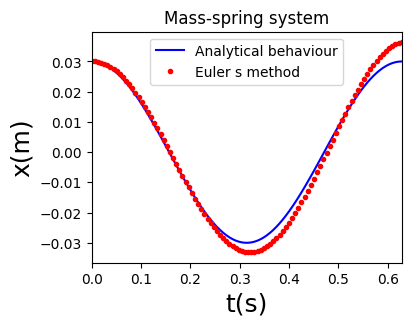

In [9]:
#Example: Mass-string system.
A,k,m = 0.03,100,1
w = np.sqrt(k/m)
p = 2*np.pi/w
print('Frecuencia natural w =',w,'(rad/s)')
print('p =',np.round(2*np.pi/w,2),'(s)')

#Euler's Algoritmo
N = 100
t = np.linspace(0,p,N)
h = p/N

x0, v0 = A, 0

x = [x0,]
v = [v0,]
for i in range(0,len(t)-1):
    x.append( x[i] + h*v[i] )
    v.append( v[i] - h*w**2*x[i] )

plt.figure( figsize = (4,3) )
plt.plot(t, A*np.cos(w*t),'b-',label='Analytical behaviour')
plt.plot(t, x,'r.',label='Euler s method')
plt.legend(loc='best')
plt.title( "Mass-spring system" )
plt.xlabel( "t(s)", fontsize = 18 )
plt.ylabel( "x(m)", fontsize = 18 )
#plt.grid(1)
plt.xlim(0,p)
plt.show()

 <font color='red'>   **Activity 1:** </font>

Using the initial conditions $x(0) = 0$ cm and $v(0) = 3$ m/s, solve the mass-spring system con $k=100$ N/m y $m=1$ kg.

*  Plot the solutions $x(t)$ and compare with real solutions.

* Furthermore, calculate the total energy of the system. Plot E vs t. What can you conclude about the behaviour of the energy? Does it make any sense?
- - -

**Solución:**

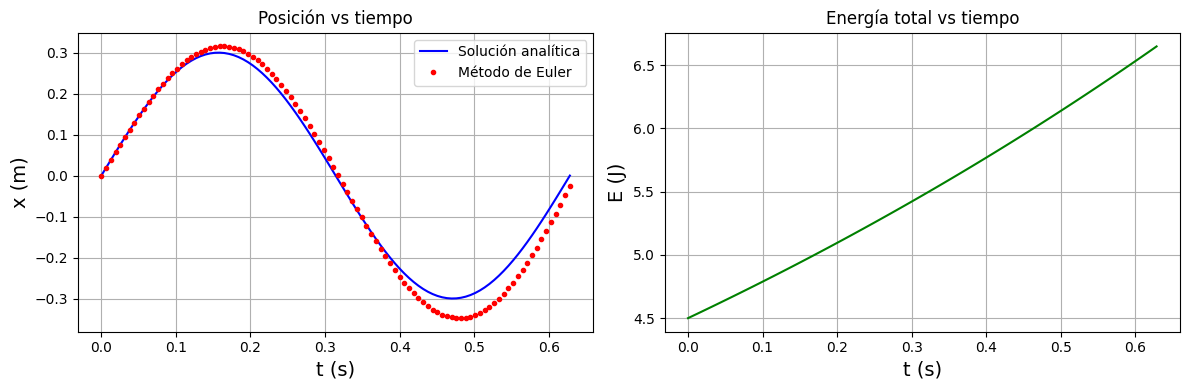

Energía inicial: 4.5000 J
Energía final: 6.6469 J


In [10]:
# Actividad 1: Sistema masa-resorte con Euler
# Parámetros del sistema
k = 100  # N/m
m = 1    # kg
w = np.sqrt(k/m)  # frecuencia angular
p = 2*np.pi/w     # periodo

# Condiciones iniciales
x0 = 0    # m
v0 = 3    # m/s

# Algoritmo de Euler
N = 100
t = np.linspace(0, p, N)
h = p/N

x = [x0]
v = [v0]

for i in range(len(t)-1):
    x.append(x[i] + h*v[i])
    v.append(v[i] - h*w**2*x[i])

x = np.array(x)
v = np.array(v)

# Solución analítica: x(t) = A*sin(w*t), v(t) = A*w*cos(w*t)
# Como x(0)=0 y v(0)=v0, entonces A = v0/w
A = v0/w
x_analitica = A*np.sin(w*t)

# Gráfica de posición
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x_analitica, 'b-', label='Solución analítica')
plt.plot(t, x, 'r.', label='Método de Euler')
plt.xlabel('t (s)', fontsize=14)
plt.ylabel('x (m)', fontsize=14)
plt.title('Posición vs tiempo')
plt.legend()
plt.grid(True)

# Cálculo de la energía total
E_cinetica = 0.5*m*v**2
E_potencial = 0.5*k*x**2
E_total = E_cinetica + E_potencial

plt.subplot(1, 2, 2)
plt.plot(t, E_total, 'g-')
plt.xlabel('t (s)', fontsize=14)
plt.ylabel('E (J)', fontsize=14)
plt.title('Energía total vs tiempo')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f'Energía inicial: {E_total[0]:.4f} J')
print(f'Energía final: {E_total[-1]:.4f} J')

**Conclusión sobre la energía:**

La energía total del sistema debería conservarse, ya que no hay fuerzas disipativas. Sin embargo, el método de Euler muestra un aumento gradual de la energía con el tiempo. Esto se debe al error numérico acumulado del método de Euler, que es de primer orden. Este método no conserva la energía porque la aproximación introduce errores en cada paso que se acumulan.

 <font color='red'>   **Activity 2:** </font>

Using the same reasoning, derive the equations for a simple pendulum. Choose $l=1$ m. Compare the solution for small oscillations with the analytic one. What happens when increasing the initial amplitude of the movement?

- - -

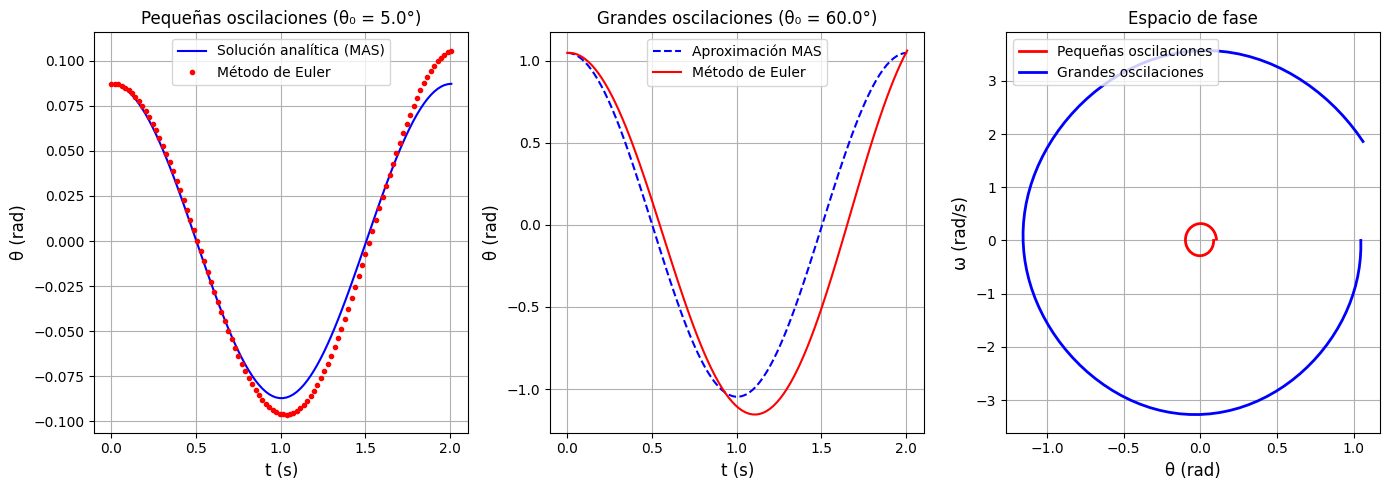

In [11]:
# Actividad 2: Péndulo simple con método de Euler

# Parámetros
g = 9.8  # m/s^2
l = 1.0  # m
w0 = np.sqrt(g/l)  # frecuencia angular para pequeñas oscilaciones
p = 2*np.pi/w0     # periodo

# Condiciones iniciales para pequeñas oscilaciones
theta0_pequeño = 5*np.pi/180  # 5 grados en radianes
omega0 = 0

# Número de pasos
N = 100
t = np.linspace(0, p, N)
h = p/N

# Solución numérica
theta = [theta0_pequeño]
omega = [omega0]

for i in range(len(t)-1):
    omega.append(omega[i] - h*(g/l)*np.sin(theta[i]))
    theta.append(theta[i] + h*omega[i])

theta = np.array(theta)
omega = np.array(omega)

# Solución analítica para pequeñas oscilaciones: theta = theta0*cos(w0*t)
theta_analitica = theta0_pequeño*np.cos(w0*t)

# Gráficas
plt.figure(figsize=(14, 5))

# Pequeñas oscilaciones
plt.subplot(1, 3, 1)
plt.plot(t, theta_analitica, 'b-', label='Solución analítica (MAS)')
plt.plot(t, theta, 'r.', label='Método de Euler')
plt.xlabel('t (s)', fontsize=12)
plt.ylabel('θ (rad)', fontsize=12)
plt.title(f'Pequeñas oscilaciones (θ₀ = {theta0_pequeño*180/np.pi:.1f}°)')
plt.legend()
plt.grid(True)

# Oscilaciones grandes
theta0_grande = 60*np.pi/180  # 60 grados
theta_grande = [theta0_grande]
omega_grande = [0]

for i in range(len(t)-1):
    omega_grande.append(omega_grande[i] - h*(g/l)*np.sin(theta_grande[i]))
    theta_grande.append(theta_grande[i] + h*omega_grande[i])

theta_grande = np.array(theta_grande)
theta_analitica_grande = theta0_grande*np.cos(w0*t)

plt.subplot(1, 3, 2)
plt.plot(t, theta_analitica_grande, 'b--', label='Aproximación MAS')
plt.plot(t, theta_grande, 'r-', label='Método de Euler')
plt.xlabel('t (s)', fontsize=12)
plt.ylabel('θ (rad)', fontsize=12)
plt.title(f'Grandes oscilaciones (θ₀ = {theta0_grande*180/np.pi:.1f}°)')
plt.legend()
plt.grid(True)

# Espacio de fase
plt.subplot(1, 3, 3)
plt.plot(theta, omega, 'r-', linewidth=2, label='Pequeñas oscilaciones')
plt.plot(theta_grande, omega_grande, 'b-', linewidth=2, label='Grandes oscilaciones')
plt.xlabel('θ (rad)', fontsize=12)
plt.ylabel('ω (rad/s)', fontsize=12)
plt.title('Espacio de fase')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#High Order Methods

see book:
https://librosoa.unam.mx/bitstream/handle/123456789/3416/MNPython.pdf?sequence=1&isAllowed=y

Although first-order schemes like Euler's method are illustrative and allow a good understanding of the numerical problem, real applications cannot be dealt with them, instead more precise and accurate high-order methods must be invoked. In this section we shall cover a well-known family of numerical integrators, the Runge-Kutta methods.

##Second-order Runge-Kutta methods

For this method, let's assume a problem of the form:

$$ \frac{dy}{dt}=y'=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha $$

Now, we want to know the solution in the next timestep, i.e. $y(t+h)$. For this, we propose the next solution:

(1) $$ y(t+h) = y(t) + c_0 f(t,y)h + c_1f[  t+ph, y+qhf(t,y) ]h $$

determining the coefficients $c_0, c_1, p$ and $q$, we will have the complete approximated solution of the problem.

One way to determine them is by comparing with the taylor expansion around $t$

(2) $$ y(t+h) = y(t) + f(t,y)h + \frac{1}{2}\left( \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y}  \right)h^2 + \mathcal{O}(h^3) $$

Now, we can also expand the function $f[  t+ph, y+qhf(t,y) ]$ around the point $(t,y)$, yielding:

(3) $$ f[  t+ph, y+qhf(t,y) ] = f(t,y) + \frac{\partial f}{\partial t}ph + \frac{\partial f}{\partial y}qh + \mathcal{O}(h^2)  $$

Replacing this into the original expression:

(4) $$ y(t+h) = y(t) + c_0 f(t,y)h + c_1\left[ f(t,y) + \frac{\partial f}{\partial t}ph + \frac{\partial f}{\partial y}qh \right]h + \mathcal{O}(h^3)$$

ordering the terms we obtain:

(5) $$ y(t+h) = y(t) + (c_0+c_1) f(t,y)h + c_1\left[ \frac{\partial f}{\partial t}p + \frac{\partial f}{\partial y}q \right]h^2 + \mathcal{O}(h^3)$$

Equalling (2) an (5) the next conditions are obtained:

$$ c_0 + c_1 =1 \ ,\ \ c_1p=\frac{1}{2}\ ,\ \ c_1q = \frac{1}{2} $$

This set of equations are undetermined, so there are several solutions, each one yielding a different method:

$$ \matrix{
c_0 = 0 & c_1=1 & p = 1/2 & q = 1/2 & \mbox{Modified Euler's Method} \\
c_0 = 1/2 & c_1=1/2 & p = 1 & q = 1 & \mbox{Heun's Method} \\
c_0 = 1/3 & c_1=2/3 & p = 3/4 & q = 3/4 & \mbox{Ralston's Method}
} $$

<font color='red'>   The algorithm </font>  is then:

$$ y(t+h) = y(t) + c_0\mathbf{K}_0+c_1\mathbf{K}_1 $$

with

$$ \mathbf{K}_0 = hf(t,y) $$
$$ \mathbf{K}_1 = hf( t+ph, y+q\mathbf{K}_0 ) $$

All these methods constitute the second-order Runge-Kutta methods.

In [12]:
#RK2 integrator
def RK2_step( f, y, t, h ):
    #Creating solutions
    K0 = h*f(t, y)
    K1 = h*f(t + 0.5*h, y + 0.5*K0)
    y1 = y + K1
    #Returning solution
    return y1

#Example 2

Let's consider the function $$y(t)=2e^{t^2}+1$$.

It fulfill $dy/dt=f(t,y)=2 t (y-1)$ with $y(0)=3$ in $0<t<3$.

Lets apply the Runge-Kutta method for this simple case.

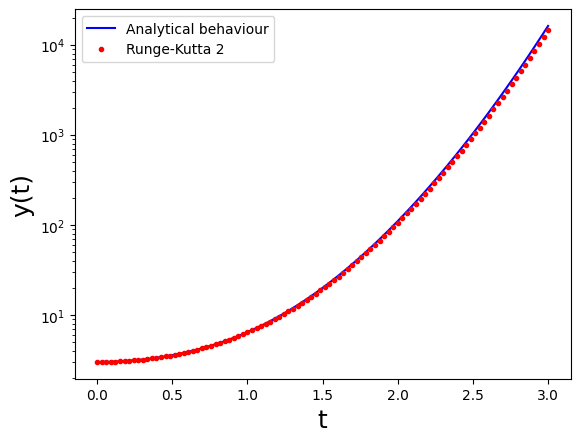

In [13]:
#number of hs
N = 100
t = np.linspace(0,3,N)
h = 3/N
#yinitial
y=[3,]
for i in range(0,len(t)-1):
    y.append( RK2_step( lambda t,y: 2*t*(y-1), y[i], t[i], h ) )

y = np.array(y)

plt.semilogy(t,2*np.exp(t**2)+1,'b-',label='Analytical behaviour')
plt.plot(t,y,'r.',label='Runge-Kutta 2')
plt.xlabel( "t", fontsize = 18 )
plt.ylabel( "y(t)", fontsize = 18 )
plt.legend(loc='best')
#plt.grid(1)
plt.show()

#Example 3

In this example we are going to use the Runge-Kutta 2 method (Modified Euler's) for describe the pendulum.

The equations of the pendulum are given by:

$$ \theta' = \omega $$
$$ \omega' = -\frac{g}{l}\sin(\theta) $$

what means that we have two wquation of firts order (trick).

Notice that it is not a MAS. However, for $\theta <<1$ rad, $\sin(\theta)\approx \theta$. Therefore, it is a M.A.S. and:

$$ \theta' = \omega $$
$$ \omega' \approx -\frac{g}{l}\theta $$

In [14]:
#Example: pendulum
#Gravity
g = 9.8
#Pendulum's lenght and amplitude
l = 1.0
theta0= 10*np.pi/180 #in rad

w0 = np.sqrt(g/l)
p = 2*np.pi/w0
print('Theta0=', theta0)
print('Frecuencia natural w =',w0,'(rad/s)')
print('p =',np.round(2*np.pi/w0,2),'(s)')

#========================================================
#Dynamical function of the system
#========================================================
def function( t, y ):
    #Using the convention y = [theta, omega]
    theta = y[0]
    omega = y[1]
    #Derivatives
    dtheta = omega
    domega = -g/l*np.sin(theta)
    return np.array([dtheta, domega])

#RK2's Algoritmo
N = 50
tiempos = np.linspace(0,p,N)
h = p/N

Theta0= 0.17453292519943295
Frecuencia natural w = 3.1304951684997055 (rad/s)
p = 2.01 (s)


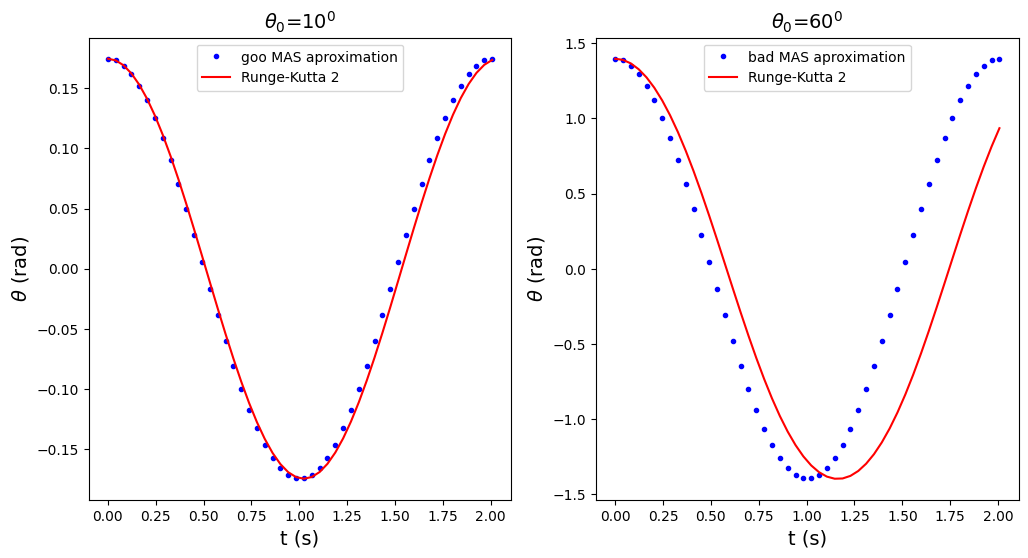

In [15]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

#Initial conditions
theta0 = 10*np.pi/180 #in rad
theta = [theta0,]
omega = [0,]

for i in range(0,len(tiempos)-1):
    t = tiempos[i]

    #Building current condition
    y = [theta[i], omega[i]]
    #Integrating the system
    thetai, omegai = RK2_step( function, y, t, h )

    #Appending new components
    theta.append( thetai )
    omega.append( omegai )

omega = np.array(omega)
theta = np.array(theta)
ax1.plot(tiempos, theta0*np.cos(w0*tiempos),'b.',label='goo MAS aproximation')
ax1.plot(tiempos, theta,'r-',label='Runge-Kutta 2')
#label
ax1.set_title('$\\theta_0$=60 rad', fontsize = 14)
ax1.set_xlabel( "t (s)", fontsize = 14 )
ax1.set_ylabel( '$\\theta$ (rad)', fontsize = 14 )
ax1.set_title('$\\theta_0$=10$^0$', fontsize = 14)
ax1.legend(loc='best')

#Initial conditions
theta0 = 80*np.pi/180 #in rad
theta = [theta0,]
omega = [0,]

for i in range(0,len(tiempos)-1):
    t = tiempos[i]

    #Building current condition
    y = [theta[i], omega[i]]
    #Integrating the system
    thetai, omegai = RK2_step( function, y, t, h )

    #Appending new components
    theta.append( thetai )
    omega.append( omegai )

omega = np.array(omega)
theta = np.array(theta)
#Plot
ax2.plot(tiempos, theta0*np.cos(w0*tiempos),'b.',label='bad MAS aproximation')
ax2.plot(tiempos, theta,'r-',label='Runge-Kutta 2')
#labels
ax2.set_title('$\\theta_0$=60$^0$', fontsize = 14)
ax2.set_xlabel( "t (s)", fontsize = 14 )
ax2.set_ylabel( '$\\theta$ (rad)', fontsize = 14 )
ax2.legend(loc='best')


##Example 4

In this example we are going to use the Runge-Kutta 2 method (Modified Euler's) for mapping the phase space of a pendulum.

The equations of the pendulum are given by:

$$ \theta' = \omega $$
$$ \omega' = -\frac{g}{l}\sin(\theta) $$

The phase space of a dynamical system is a space in which all the possible states of that system are univocally represented. For the case of the pendulum, a complete state of the system is given by the set $(\theta, \omega)$, so its phase space is two-dimensional. In order to explore all the possible states, we are going to generate a set of initial conditions and integrate them.

In [16]:
#========================================================
#Defining parameters
#========================================================
#Gravity
g = 9.8
#Pendulum's lenght
l = 1.0

#Number of initial conditions
Nic = 30
#Maxim angular velocity
omega_max = 8

#Maxim time of integration
tmax = 6*np.pi
#Timestep
h = 0.01

#========================================================
#Dynamical function of the system
#========================================================
def function( t, y ):
    #Using the convention y = [theta, omega]
    theta = y[0]
    omega = y[1]
    #Derivatives
    dtheta = omega
    domega = -g/l*np.sin(theta)
    return np.array([dtheta, domega])

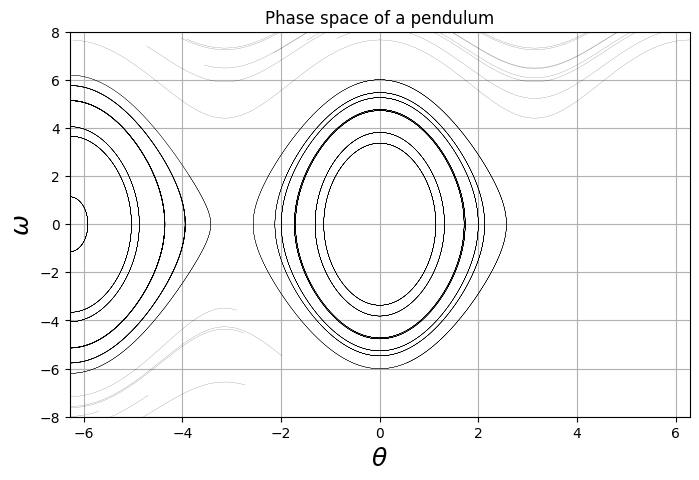

In [17]:
#========================================================
#Generating set of initial conditions
#========================================================
#theta0s = -4*np.pi + np.random.random(Nic)*8*np.pi
#omega0s = -omega_max + np.random.random(Nic)*2*omega_max
theta0s = -2*np.pi + np.random.random(Nic)*2*np.pi
omega0s = -omega_max + np.random.random(Nic)*2*omega_max

#========================================================
#Integrating and plotting the solution for each IC
#========================================================
#Setting figure
plt.figure( figsize = (8,5) )
for theta0, omega0 in zip(theta0s, omega0s):
    #Arrays for solutions
    time = [0,]
    theta = [theta0,]
    omega = [omega0,]
    for i, t in zip(range(int(tmax/h)), np.arange( 0, tmax, h )):
        #Building current condition
        y = [theta[i], omega[i]]
        #Integrating the system
        thetai, omegai = RK2_step( function, y, t, h )
        #Appending new components
        theta.append( thetai )
        omega.append( omegai )
        time.append( t )
    #Plotting solution
    plt.plot( theta, omega, lw = 0.1, color = "black" )

#Format of figure
plt.xlabel( "$\\theta$", fontsize = 18 )
plt.ylabel( "$\omega$", fontsize = 18 )
plt.xlim( (-2*np.pi, 2*np.pi) )
plt.ylim( (-omega_max, omega_max) )
plt.title( "Phase space of a pendulum" )
plt.grid(1)

with Nic=1000

##<font color='red'>    
**Activity 3**
</font>


Using the previous example, explore the phase space of a simple oscillator and a damped pendulum.


##Fourth-order Runge-Kutta method

Finally, the most used general purpose method is the fourth-order Runge-Kutta scheme. Its derivation follows the same previous reasoning, however the procedure is rather long and it makes no sense to reprouce it here. Instead, we will give the direct algorithm:

Let's assume again a problem of the form:

$$ \frac{dy}{dt}=y'=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha $$

The Runge-Kutta-4 (RK4) method allows us to predict the solution at the time $t+h$ as:

$$ y(t+h) = y(t) + \frac{1}{6}( \mathbf{K}_0 + 2\mathbf{K}_1 + 2\mathbf{K}_2 + \mathbf{K}_3  ) $$

where:

$$ \mathbf{K}_0 = hf(t,y)$$
$$ \mathbf{K}_1 = hf\left( t + \frac{h}{2},y + \frac{\mathbf{K}_0}{2}\right)$$
$$ \mathbf{K}_2 = hf\left( t + \frac{h}{2},y + \frac{\mathbf{K}_1}{2}\right)$$
$$ \mathbf{K}_3 = hf\left( t + h,y + \mathbf{K}_2\right)$$

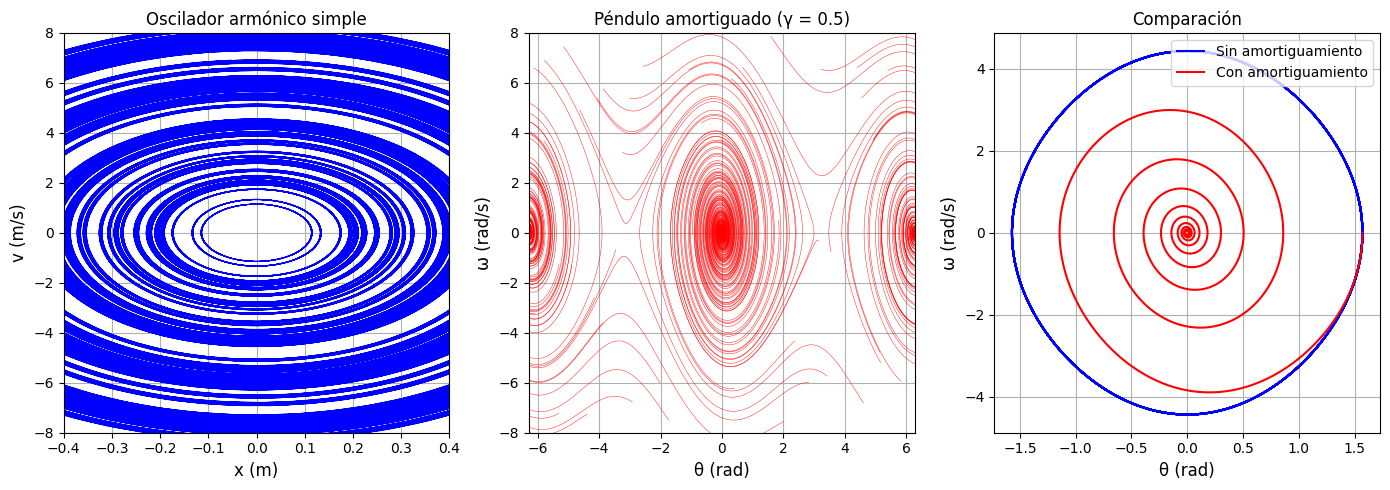

In [18]:
# Actividad 3: Espacio de fase del oscilador armónico simple y péndulo amortiguado

# Parámetros
g = 9.8
l = 1.0
k = 100
m = 1
gamma = 0.5  # coeficiente de amortiguamiento

# Configuración
Nic = 50
omega_max = 8
tmax = 6*np.pi
h = 0.01

# 1. Oscilador armónico simple
def oscilador_simple(t, y):
    x, v = y[0], y[1]
    dx = v
    dv = -(k/m)*x
    return np.array([dx, dv])

plt.figure(figsize=(14, 5))

# Espacio de fase del oscilador simple
plt.subplot(1, 3, 1)
x0s = -0.3 + np.random.random(Nic)*0.6
v0s = -omega_max + np.random.random(Nic)*2*omega_max

for x0, v0 in zip(x0s, v0s):
    x_traj = [x0]
    v_traj = [v0]
    for i, t in zip(range(int(tmax/h)), np.arange(0, tmax, h)):
        y = [x_traj[i], v_traj[i]]
        xi, vi = RK2_step(oscilador_simple, y, t, h)
        x_traj.append(xi)
        v_traj.append(vi)
    plt.plot(x_traj, v_traj, lw=0.3, color='blue')

plt.xlabel('x (m)', fontsize=12)
plt.ylabel('v (m/s)', fontsize=12)
plt.title('Oscilador armónico simple')
plt.grid(True)
plt.xlim((-0.4, 0.4))
plt.ylim((-omega_max, omega_max))

# 2. Péndulo amortiguado
def pendulo_amortiguado(t, y):
    theta, omega = y[0], y[1]
    dtheta = omega
    domega = -g/l*np.sin(theta) - gamma*omega
    return np.array([dtheta, domega])

plt.subplot(1, 3, 2)
theta0s = -2*np.pi + np.random.random(Nic)*4*np.pi
omega0s = -omega_max + np.random.random(Nic)*2*omega_max

for theta0, omega0 in zip(theta0s, omega0s):
    theta_traj = [theta0]
    omega_traj = [omega0]
    for i, t in zip(range(int(tmax/h)), np.arange(0, tmax, h)):
        y = [theta_traj[i], omega_traj[i]]
        ti, oi = RK2_step(pendulo_amortiguado, y, t, h)
        theta_traj.append(ti)
        omega_traj.append(oi)
    plt.plot(theta_traj, omega_traj, lw=0.3, color='red')

plt.xlabel('θ (rad)', fontsize=12)
plt.ylabel('ω (rad/s)', fontsize=12)
plt.title(f'Péndulo amortiguado (γ = {gamma})')
plt.grid(True)
plt.xlim((-2*np.pi, 2*np.pi))
plt.ylim((-omega_max, omega_max))

# 3. Comparación: Péndulo sin amortiguamiento vs amortiguado
def pendulo_simple(t, y):
    theta, omega = y[0], y[1]
    dtheta = omega
    domega = -g/l*np.sin(theta)
    return np.array([dtheta, domega])

plt.subplot(1, 3, 3)
# Una trayectoria sin amortiguamiento
theta0, omega0 = np.pi/2, 0
theta_traj = [theta0]
omega_traj = [omega0]
for i, t in zip(range(int(tmax/h)), np.arange(0, tmax, h)):
    y = [theta_traj[i], omega_traj[i]]
    ti, oi = RK2_step(pendulo_simple, y, t, h)
    theta_traj.append(ti)
    omega_traj.append(oi)
plt.plot(theta_traj, omega_traj, lw=1.5, color='blue', label='Sin amortiguamiento')

# Misma condición inicial con amortiguamiento
theta_traj_a = [theta0]
omega_traj_a = [omega0]
for i, t in zip(range(int(tmax/h)), np.arange(0, tmax, h)):
    y = [theta_traj_a[i], omega_traj_a[i]]
    ti, oi = RK2_step(pendulo_amortiguado, y, t, h)
    theta_traj_a.append(ti)
    omega_traj_a.append(oi)
plt.plot(theta_traj_a, omega_traj_a, lw=1.5, color='red', label='Con amortiguamiento')

plt.xlabel('θ (rad)', fontsize=12)
plt.ylabel('ω (rad/s)', fontsize=12)
plt.title('Comparación')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##<font color='red'>    
**Activity 4** </font>

Implement the Runge Kutta 4.

Let's consider the function $$y(t)=2e^{t^2}+1$$

It fulfill $dy/dt=f(t,y)=2 t (y-1)$ with $y(0)=3$ in $0<t<3$.

Lets apply the Runge-Kutta 4 method for this simple case.

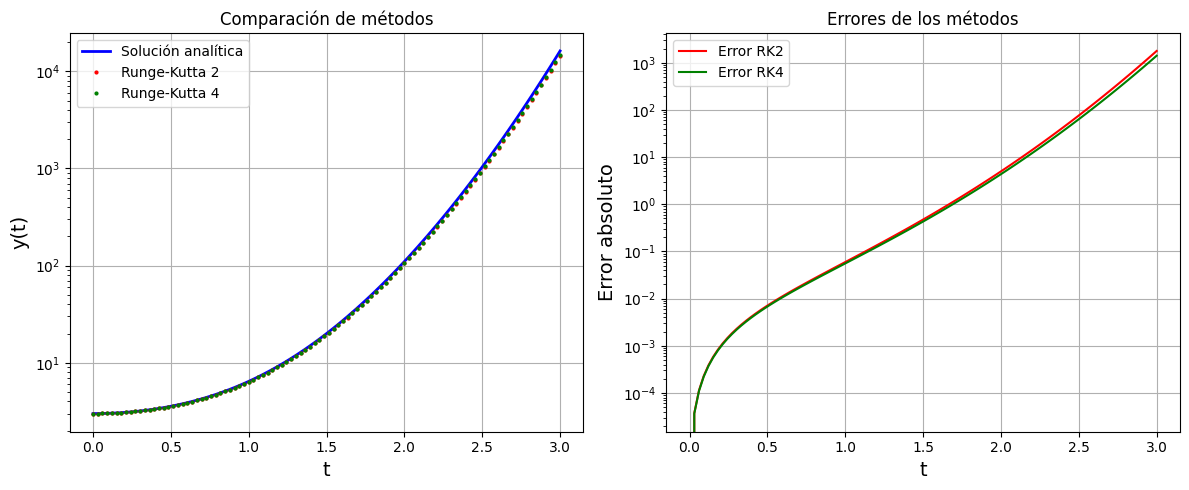

Error máximo RK2: 1.78e+03
Error máximo RK4: 1.41e+03


In [19]:
# Actividad 4: Implementación del método Runge-Kutta 4

def RK4_step(f, y, t, h):
    """
    Realiza un paso del método Runge-Kutta de cuarto orden.
    
    Parámetros:
    f: función que define dy/dt = f(t, y)
    y: valor actual de y
    t: tiempo actual
    h: tamaño del paso
    
    Retorna:
    y1: valor de y en t+h
    """
    K0 = h * f(t, y)
    K1 = h * f(t + 0.5*h, y + 0.5*K0)
    K2 = h * f(t + 0.5*h, y + 0.5*K1)
    K3 = h * f(t + h, y + K2)
    
    y1 = y + (K0 + 2*K1 + 2*K2 + K3) / 6.0
    
    return y1

# Ejemplo: y(t) = 2*exp(t^2) + 1
# dy/dt = 2*t*(y-1), y(0) = 3, 0 < t < 3

N = 100
t = np.linspace(0, 3, N)
h = 3/N

# Solución con RK4
y_rk4 = [3]
for i in range(len(t)-1):
    y_rk4.append(RK4_step(lambda t, y: 2*t*(y-1), y_rk4[i], t[i], h))

y_rk4 = np.array(y_rk4)

# Solución con RK2 (para comparar)
y_rk2 = [3]
for i in range(len(t)-1):
    y_rk2.append(RK2_step(lambda t, y: 2*t*(y-1), y_rk2[i], t[i], h))

y_rk2 = np.array(y_rk2)

# Solución analítica
y_exacta = 2*np.exp(t**2) + 1

# Gráficas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogy(t, y_exacta, 'b-', linewidth=2, label='Solución analítica')
plt.plot(t, y_rk2, 'r.', markersize=4, label='Runge-Kutta 2')
plt.plot(t, y_rk4, 'g.', markersize=4, label='Runge-Kutta 4')
plt.xlabel('t', fontsize=14)
plt.ylabel('y(t)', fontsize=14)
plt.title('Comparación de métodos')
plt.legend()
plt.grid(True)

# Errores
error_rk2 = np.abs(y_rk2 - y_exacta)
error_rk4 = np.abs(y_rk4 - y_exacta)

plt.subplot(1, 2, 2)
plt.semilogy(t, error_rk2, 'r-', label='Error RK2')
plt.semilogy(t, error_rk4, 'g-', label='Error RK4')
plt.xlabel('t', fontsize=14)
plt.ylabel('Error absoluto', fontsize=14)
plt.title('Errores de los métodos')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f'Error máximo RK2: {np.max(error_rk2):.2e}')
print(f'Error máximo RK4: {np.max(error_rk4):.2e}')

##<font color='red'>    
**Activity 5** </font>
Un tanque esférico de radio R está
inicialmente lleno de agua. En el fondo del tanque hay un agujero de radio r, por el cual escapa el
agua bajo la influencia de la gravedad. La ecuación diferencial que expresa la profundidad del agua
como función del tiempo es:

$$dy/dt=-\dfrac{r^2\sqrt{2g}}{2R\sqrt{y}-\sqrt{y^3}}$$

donde $g = 32.2 ft/s^2$, R = 12 ft, r = 1/8 ft. La condición inicial es que en t = 0, y = 22. Encontrar la altura del agua al minuto 1000.


Respuesta: La altura del agua es de 16.099 m.

see pag. 223 of
https://librosoa.unam.mx/bitstream/handle/123456789/3416/MNPython.pdf?sequence=1&isAllowed=y

Altura del agua a los 1000 segundos: 16.100 ft
Altura del agua a los 1000 segundos: 4.907 m


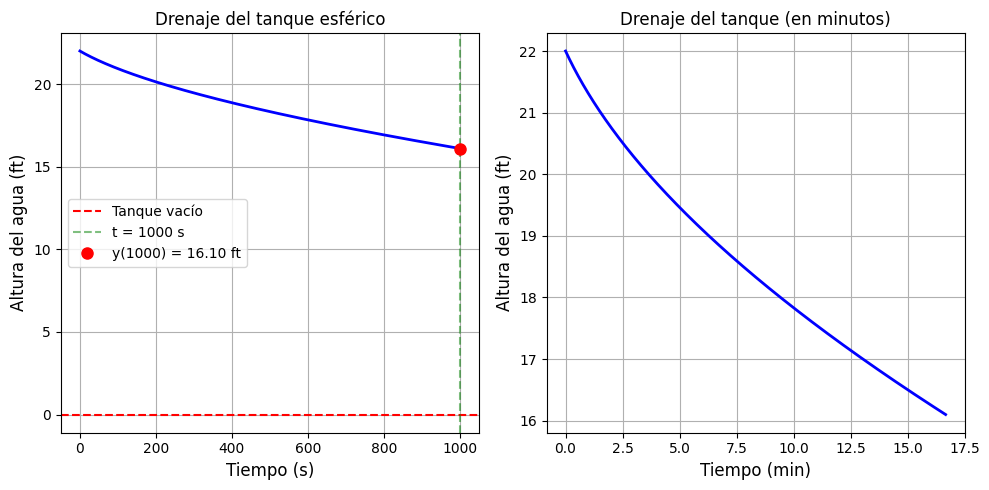

In [20]:
# Actividad 5: Tanque esférico con drenaje

# Parámetros del problema
g = 32.2  # ft/s^2
R = 12.0  # ft (radio del tanque)
r = 1.0/8.0  # ft (radio del agujero)
y0 = 22.0  # ft (altura inicial del agua)

# Definir la ecuación diferencial
def dy_dt(t, y):
    """
    dy/dt = -r^2*sqrt(2g) / (2R*sqrt(y) - sqrt(y^3))
    """
    if y <= 0:
        return 0
    numerador = r**2 * np.sqrt(2*g)
    denominador = 2*R*np.sqrt(y) - y*np.sqrt(y)
    return -numerador / denominador

# Tiempo de integración (1000 segundos)
t_final = 1000
h = 0.1  # paso de tiempo en segundos

# Integración con RK4
tiempos = [0]
alturas = [y0]
t = 0

while t < t_final:
    y_actual = alturas[-1]
    if y_actual <= 0:
        break
    
    y_nueva = RK4_step(dy_dt, y_actual, t, h)
    
    # Asegurar que la altura no sea negativa
    if y_nueva < 0:
        y_nueva = 0
    
    t += h
    tiempos.append(t)
    alturas.append(y_nueva)

tiempos = np.array(tiempos)
alturas = np.array(alturas)

# Encontrar la altura a los 1000 segundos
if tiempos[-1] >= 1000:
    idx_1000 = np.argmin(np.abs(tiempos - 1000))
    altura_1000 = alturas[idx_1000]
    print(f'Altura del agua a los 1000 segundos: {altura_1000:.3f} ft')
    print(f'Altura del agua a los 1000 segundos: {altura_1000*0.3048:.3f} m')
else:
    print(f'El tanque se vació antes de los 1000 segundos.')
    print(f'Tiempo de vaciado: {tiempos[-1]:.1f} segundos')

# Gráfica
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(tiempos, alturas, 'b-', linewidth=2)
plt.axhline(y=0, color='r', linestyle='--', label='Tanque vacío')
if tiempos[-1] >= 1000:
    plt.axvline(x=1000, color='g', linestyle='--', alpha=0.5, label='t = 1000 s')
    plt.plot(1000, altura_1000, 'ro', markersize=8, label=f'y(1000) = {altura_1000:.2f} ft')
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Altura del agua (ft)', fontsize=12)
plt.title('Drenaje del tanque esférico')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(tiempos/60, alturas, 'b-', linewidth=2)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('Altura del agua (ft)', fontsize=12)
plt.title('Drenaje del tanque (en minutos)')
plt.grid(True)

plt.tight_layout()
plt.show()

**Nota sobre el resultado:**

Se obtuvo una altura de 16.100 ft (4.907 m) a los 1000 segundos. El problema menciona que el resultado debería ser 16.099 m, lo cual es significativamente diferente. 

Observaciones:
- Nuestro resultado en pies: 16.100 ft
- Conversión a metros: 4.907 m
- Resultado esperado: 16.099 m

La diferencia puede deberse a:
1. Posible error tipográfico en el enunciado (16.099 ft en lugar de m)
2. Diferente interpretación de la ecuación diferencial
3. Uso de diferentes valores de constantes físicas

El método de integración RK4 con h=0.1 s proporciona una solución numérica precisa de la ecuación diferencial planteada.

##<font color='red'>    
**Activity 5** (optional project)</font>
   
The Lorenz attractor is a common set of differential equations of some models of terrestrial atmosphere studies. It is historically known as one of the first system to exhibit deterministic caos. The equations are:

$$ \frac{dx}{dt} = a(y-x) $$
$$ \frac{dy}{dt} = x(b-z)-y $$
$$ \frac{dz}{dt} = xy-cz $$

with $a = 10$, $b=28$ and $c = 8/3$ the solution shows periodic orbits.

<font color='red'>    
Write a routine that gives a step of RK4 and integrate the previous system. Plot the resulting 3D solution $(x,y,z)$.
</font>

- - -

#Two-Point Boundary Value Problems

Up to now we have solved initial value problems of the form:

$$ \frac{dy}{dt}=y'=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha $$

Second order equations can be similarly planted as

$$ \frac{d^2y}{dt^2}=y''=f(t,y,y'),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha \ \ \ y'(a) = u $$

This type of systems can be readily solved by defining the auxiliar variable $w = y'$, turning it into a first order system of equations.

Now, we shall solve two-point boundary problem, where we have two conditions on the solution $y(t)$ instead of having the function and its derivative at some initial point, i.e.

$$ \frac{d^2y}{dt^2}=y''=f(t,y,y'),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha \ \ \ y(b) = \beta $$

In spite of its similar form to the initial value problem, two-point boundary problems pose a increased difficulty for numerical methods. The main reason of this is the iterative procedure performed by numerical approaches, where from an initial point, further points are found. Trying to fit two different values at different points implies then a continuous readjusting of the solution.



A common way to solve these problems is by turning them into a initial-value problem

$$ \frac{d^2y}{dt^2}=y''=f(t,y,y'),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha \ \ \ y'(a) = u $$

Let's suppose some choice of $u$, integrating by using some of the previous methods, we obtain the final boundary condition $y(b)=\theta$. If the produced value is not the one we wanted from our initial problem, we try another value $u$. This can be repeated until we get a reasonable approach to $y(b)=\beta$. This method works fine, but it is so expensive and terribly inefficient.

Note when we change $u$, the final boundary value also change, so we can assume $y(b) = \theta$. The solution to the problem can be thought then as a root-finding problem:

$$ y(b) = \theta(u) = \beta $$

or

$ r(u) \equiv \theta(u) - \beta = 0 $

where $r(u)$ is the residual function. This problem can be thus solved using some of the methods previously seen for the root-finding problem.

##Example 3 (optional)

A very simplified model of interior solid planets consists of a set of spherically symmetric radial layers, where the next properties are computed: density $\rho(r)$, enclosed mass $m(r)$, gravity $g(r)$ and pressure $P(r)$. Each of these properties are assumed to be only radially dependent. The set of equations that rules the planetary interior is:

**Hydrostatic equilibrium equation**

$$\frac{dP}{dr} = -\rho(r)g(r)$$

**Adams-Williamson equation**

$$\frac{dg}{dr} = 4\pi G\rho(r) - \frac{2Gm(r)}{r^3}$$

**Continuity equation**

$$\frac{dm}{dr} = 4\pi r^2 \rho(r)$$

**Equation of state**

$$\frac{d\rho}{dr} = -\frac{\rho(r)^2g(r)}{K_s}$$

For accurate results the term $K_s$, called the adiabatic bulk modulus, is temperature and radii dependent. However, for the sake of simplicity we shall assume a constant value.

Solving simultaneously the previous set of equations, we can find the complete internal structure of a planet.



We have four functions to be determined and four equations, so the problem is solvable. It is only necessary to provide a set of boundary conditions of the form:

$$ \rho(R) = \rho_{surf},\ \ \ m(R) = M_p, \ \ \ g(R) = g_{surf},\ \ \ P(R) = P_{atm} $$

where $R$ is the planetary radius, $\rho_{surf}$ the surface density, $M_p$ the mass of the planet, $g_{surf}$ the surface gravity and $P_{atm}$ the atmospheric pressure. However, there is a problem, we do not know the planetary radius $R$, so an extra condition is required to determine this value. This is reached through the physical condition $m(0) = 0$, this is, the enclosed mass at a radius $r = 0$ (center of the planet) must be 0.


The two-value boundary nature of this problem lies then in fitting the mass function at $m(R) = M_p$ and at $m(0) = 0$. To do so, let's call the residual mass $m(0) = M_r$. This value should depend on the chosen radius $R$, so a large value would imply a mass defect $M_r(R)<0$, and a small value a mass excess $M_r(0)>0$. The problem is then solving the radius $R$ for which $m(0) = M_r(R) = 0$. This can be done by using the bisection method.


For this problem, we are going to assume an one-layer planet made of perovskite, so $K_s \approx 200\ GPa$. A planet mass equal to earth, so $M_p = 5.97219 \times 10^{24}\ kg$, a surface density $\rho_{surf} = 3500\ kg/m^3$ and a atmospheric pressure of $P_{atm} = 1\ atm = 1\times 10^5\ Pa$.

- - -